In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load the training and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [10]:
# Print head of the train_data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [12]:
# Print head of the test_data
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal


In [13]:
# Drop irrelevent column to avoid false prediction
train_data.drop('Id', axis=1, inplace=True)
test_data.drop('Id', axis=1, inplace=True)

In [14]:
# Fill missing values using mode for categorical and mean for numerical columns
train_data.fillna(train_data.mode().iloc[0], inplace=True)
test_data.fillna(test_data.mode().iloc[0], inplace=True)

In [15]:
# Select features for the model
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']
X = train_data[features]
y = train_data['SalePrice']

In [16]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict on the validation set
y_pred = model.predict(X_val)

In [19]:
# Evaluate the model using MAE, MSE, and R-squared metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 36073.13878245481
Mean Squared Error: 2809126045.944859
R-squared: 0.6337670693441046


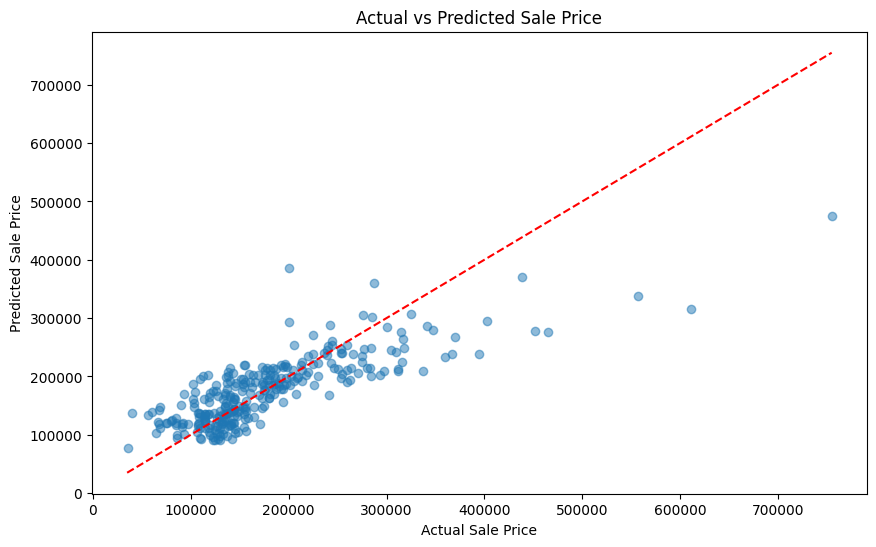

In [20]:
# Plot Actual vs Predicted Sale Price
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

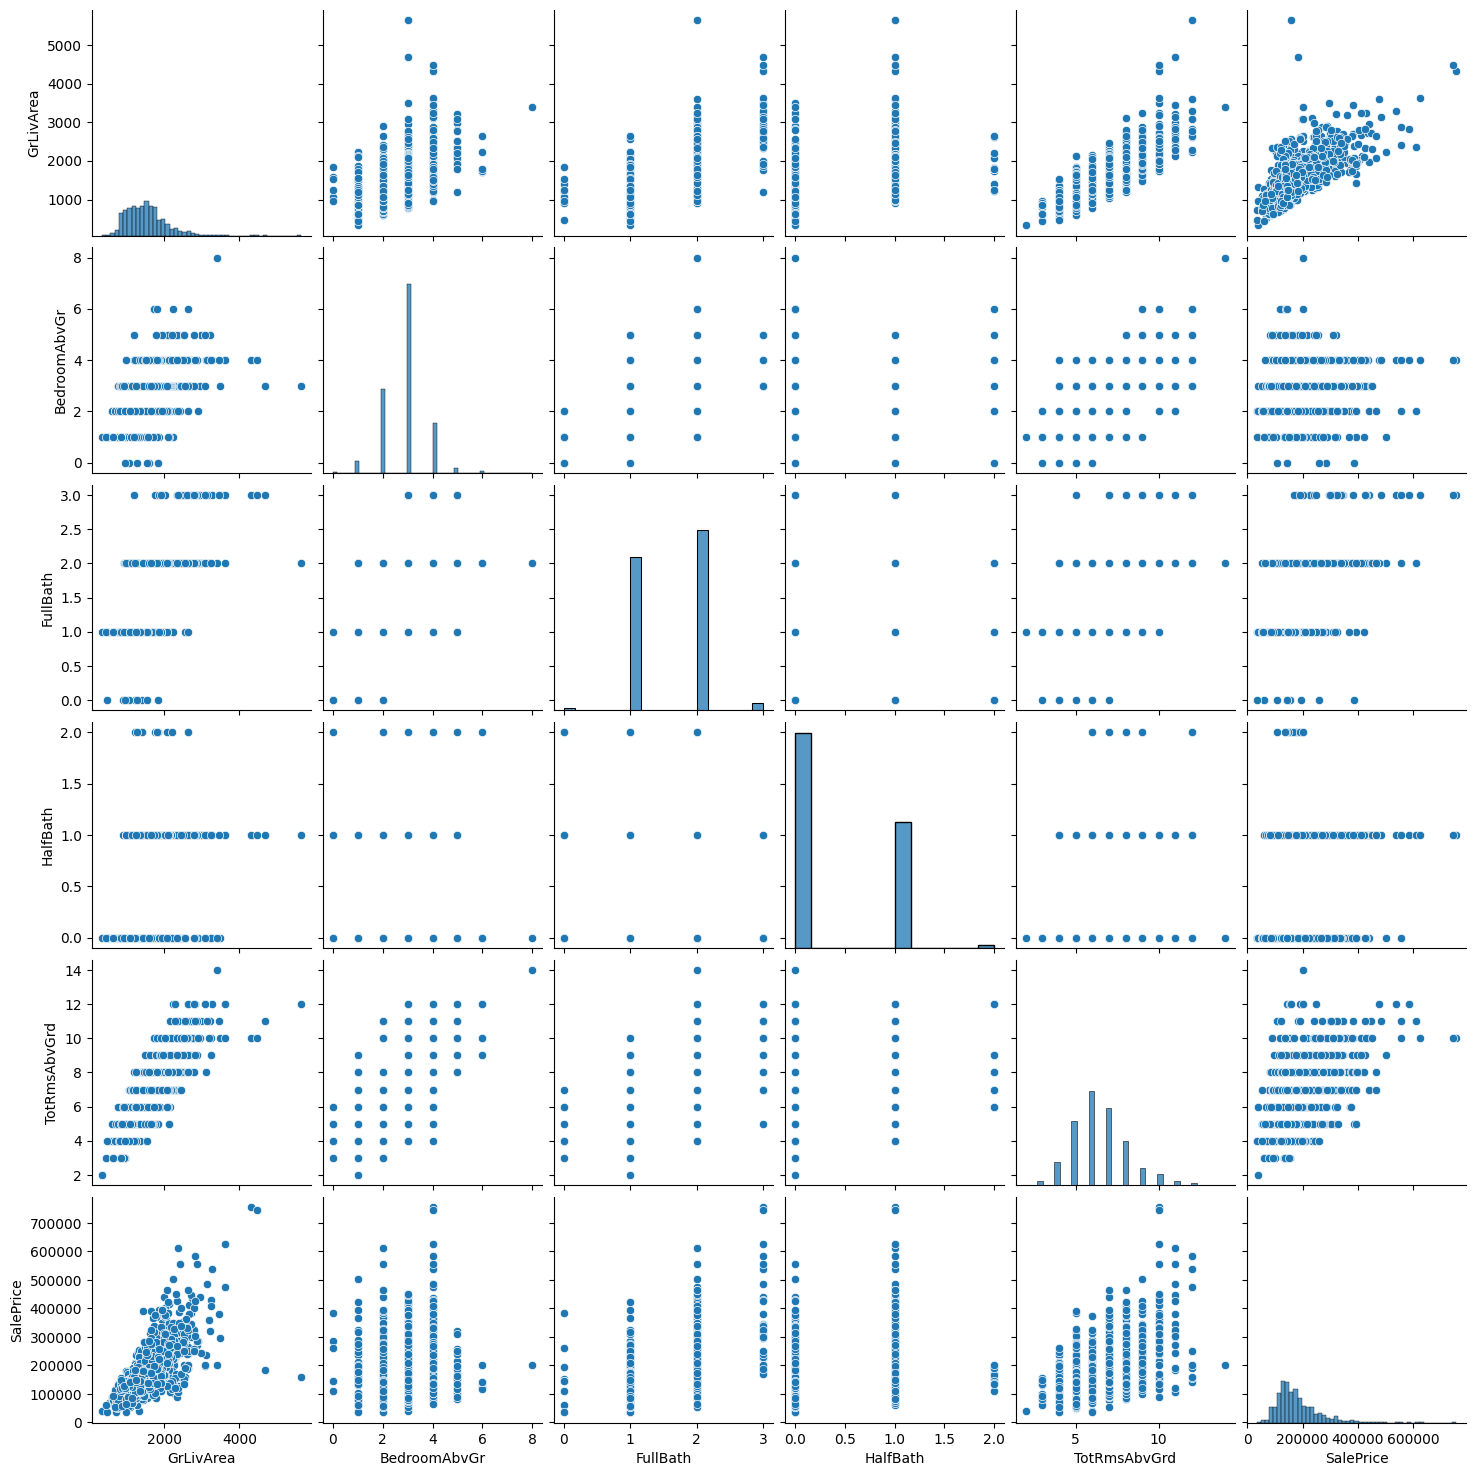

In [21]:
# Create pairplot for the selected features against SalePrice
sns.pairplot(train_data[features + ['SalePrice']])
plt.show()

In [22]:
# Example prediction for a new house
example = pd.DataFrame({
    'GrLivArea': [2000],
    'BedroomAbvGr': [3],
    'FullBath': [2],
    'HalfBath': [1],
    'TotRmsAbvGrd': [7]
})
example_prediction = model.predict(example)
print(f'Example Prediction: ${example_prediction[0]:,.2f}')

Example Prediction: $240,896.28
